##ARBOLES DE DESICIONES

##DEIBYS ALEJANDRO CABEZA MENDOZA                                                                                                                       ##ANÁLISIS DE DATOS - (202016908A_1704)

In [4]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [8]:
#Cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
data.shape

(1599, 12)

In [14]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [16]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([ 37., 515., 323., 257., 232., 119.,  87.,  21.,   7.,   1.]),
 array([ 8.4 ,  9.05,  9.7 , 10.35, 11.  , 11.65, 12.3 , 12.95, 13.6 ,
        14.25, 14.9 ]),
 <BarContainer object of 10 artists>)

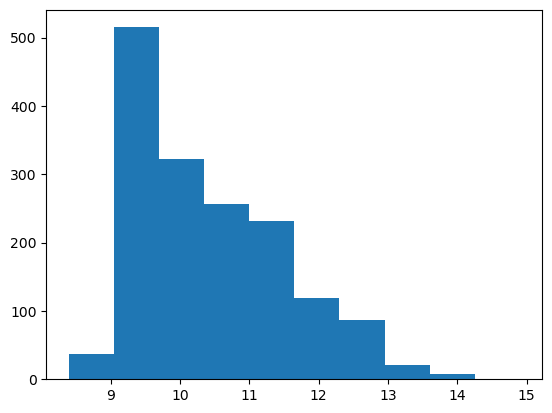

In [20]:
plt.hist(data.alcohol)

<Axes: xlabel='sulphates', ylabel='alcohol'>

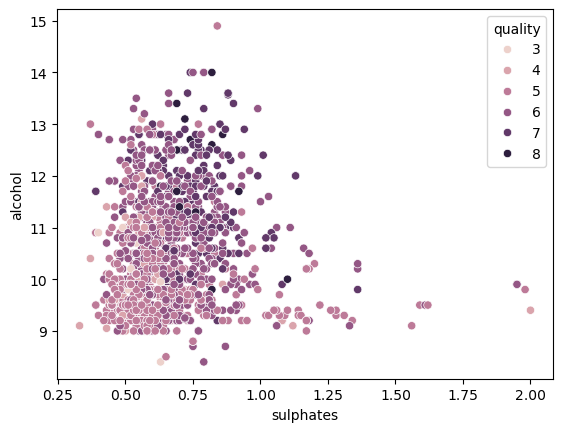

In [42]:
sns.scatterplot(x = "sulphates", y = "alcohol", hue = "quality", data = data)

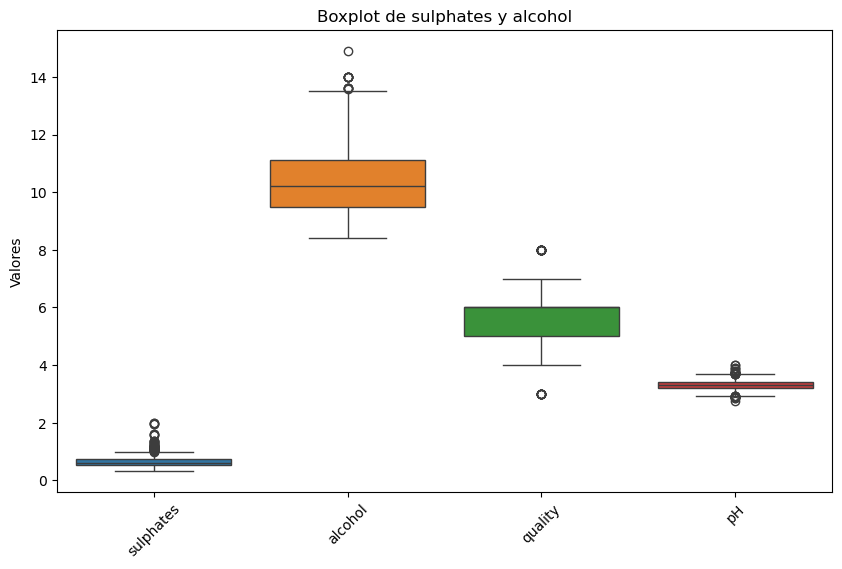

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['sulphates', 'alcohol', 'quality', 'pH']])
plt.xticks(rotation=45)
plt.title('Boxplot de sulphates y alcohol')
plt.ylabel('Valores')
plt.show()

In [57]:
predictors_col = ["sulphates", "alcohol", "quality", "pH"]
target_col = ['quality']

In [59]:
predictors = data[predictors_col]
target = data[target_col]

In [61]:
predictors

,sulphates,alcohol,quality,pH
0,0.56,9.4,5,3.51
1,0.68,9.8,5,3.20
2,0.65,9.8,5,3.26
3,0.58,9.8,6,3.16
4,0.56,9.4,5,3.51
...,...,...,...,...
1594,0.58,10.5,5,3.45
1595,0.76,11.2,6,3.52
1596,0.75,11.0,6,3.42
1597,0.71,10.2,5,3.57


In [63]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [65]:
corr = predictors.corr()
corr

,sulphates,alcohol,quality,pH
sulphates,1.000000,0.093595,0.251397,-0.196648
alcohol,0.093595,1.000000,0.476166,0.205633
quality,0.251397,0.476166,1.000000,-0.057731
pH,-0.196648,0.205633,-0.057731,1.000000


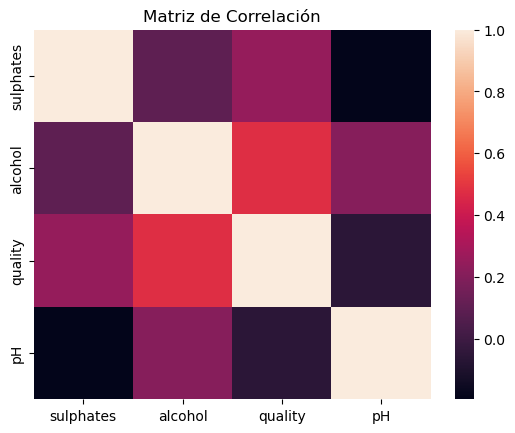

In [67]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

In [69]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [71]:
tree = DecisionTreeClassifier()

In [73]:
arbol = tree.fit(X_train, y_train)


[Text(0.5, 0.875, 'x[2] <= 5.5\ngini = 0.646\nsamples = 1279\nvalue = [9.0, 45.0, 535.0, 514.0, 164.0, 12.0]'),
 Text(0.3, 0.625, 'x[2] <= 4.5\ngini = 0.169\nsamples = 589\nvalue = [9, 45, 535, 0, 0, 0]'),
 Text(0.4, 0.75, 'True  '),
 Text(0.2, 0.375, 'x[2] <= 3.5\ngini = 0.278\nsamples = 54\nvalue = [9, 45, 0, 0, 0, 0]'),
 Text(0.1, 0.125, 'gini = 0.0\nsamples = 9\nvalue = [9, 0, 0, 0, 0, 0]'),
 Text(0.3, 0.125, 'gini = 0.0\nsamples = 45\nvalue = [0, 45, 0, 0, 0, 0]'),
 Text(0.4, 0.375, 'gini = 0.0\nsamples = 535\nvalue = [0, 0, 535, 0, 0, 0]'),
 Text(0.7, 0.625, 'x[2] <= 6.5\ngini = 0.388\nsamples = 690\nvalue = [0, 0, 0, 514, 164, 12]'),
 Text(0.6, 0.75, '  False'),
 Text(0.6, 0.375, 'gini = 0.0\nsamples = 514\nvalue = [0, 0, 0, 514, 0, 0]'),
 Text(0.8, 0.375, 'x[2] <= 7.5\ngini = 0.127\nsamples = 176\nvalue = [0, 0, 0, 0, 164, 12]'),
 Text(0.7, 0.125, 'gini = 0.0\nsamples = 164\nvalue = [0, 0, 0, 0, 164, 0]'),
 Text(0.9, 0.125, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 0, 0, 0, 12]

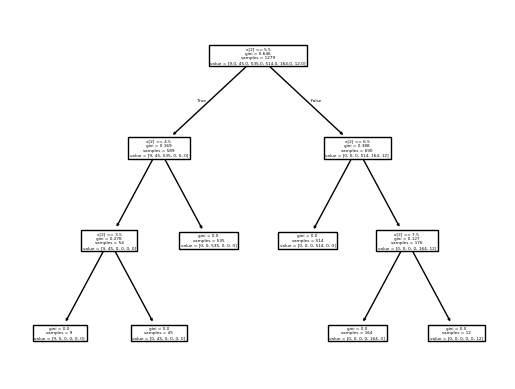

In [75]:
plot_tree(arbol)

In [77]:
predicciones = arbol.predict(X_test)

In [79]:
predicciones

array([6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 6, 6, 5, 6, 7, 8, 6, 7, 6, 5, 5, 5,
       6, 5, 7, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5, 6, 6,
       5, 5, 6, 7, 8, 6, 5, 6, 6, 5, 7, 6, 5, 7, 6, 5, 5, 5, 5, 5, 7, 7,
       5, 5, 5, 3, 6, 5, 7, 6, 6, 6, 6, 5, 5, 6, 8, 7, 5, 5, 6, 6, 6, 5,
       7, 6, 5, 6, 6, 5, 7, 6, 5, 6, 6, 6, 5, 6, 5, 5, 6, 8, 5, 6, 5, 7,
       6, 6, 7, 6, 5, 6, 6, 7, 6, 6, 5, 4, 5, 7, 6, 6, 5, 5, 6, 7, 6, 5,
       6, 7, 7, 5, 7, 5, 6, 6, 6, 6, 5, 7, 8, 4, 5, 4, 6, 6, 5, 6, 6, 5,
       5, 5, 5, 7, 6, 5, 6, 6, 6, 4, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 7, 5,
       5, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6, 6, 4, 5, 5, 6, 5, 5, 6, 5, 6, 7,
       5, 5, 6, 6, 4, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5, 6, 7, 5, 5, 6, 6, 6,
       5, 5, 6, 5, 5, 6, 5, 5, 4, 7, 6, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 6,
       7, 6, 5, 6, 6, 6, 5, 6, 6, 5, 5, 6, 6, 7, 5, 7, 5, 5, 6, 7, 6, 5,
       6, 6, 6, 7, 5, 5, 6, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 7, 5,
       6, 7, 5, 5, 6, 6, 5, 6, 5, 5, 6, 5, 5, 6, 5,

In [81]:
# Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,1,0,0,0,0,0
4,0,8,0,0,0,0
5,0,0,146,0,0,0
6,0,0,0,124,0,0
7,0,0,0,0,35,0
8,0,0,0,0,0,6


In [83]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

1.0

In [87]:
precision = precision_score(y_test, predicciones, average='weighted')
precision

1.0

In [89]:
recall = recall_score(y_test, predicciones, average='weighted')
recall

1.0

In [94]:
f1 = f1_score(y_test, predicciones, average='weighted')
f1

1.0